<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/07_pandas_groupby_pivottable_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 패키지 설치

In [1]:
!pip install mySUNI

## 모듈 import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from mySUNI import cds
from IPython.display import Image

## 데이터셋 로드

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**컬럼(columns) 설명**

- survivied: 생존여부 (1: 생존, 0: 사망)
- pclass: 좌석 등급 (1등급, 2등급, 3등급)
- sex: 성별
- age: 나이
- sibsp: 형제 + 배우자 수
- parch: 부모 + 자녀 수
- fare: 좌석 요금
- embarked: 탑승 항구 (S, C, Q)
- class: pclass와 동일
- who: 성별과 동일
- adult_male: 성인 남자 여부
- deck: 데크 번호 (알파벳 + 숫자 혼용)
- embark_town: 탑승 항구 이름
- alive: 생존여부 (yes, no)
- alone: 혼자 탑승 여부

## apply() - 함수를 적용

`apply()`는 데이터 전처리시 굉장히 많이 활용하는 기능입니다.

좀 더 복잡한 **logic을 컬럼 혹은 DataFrame에 적용**하고자 할 때 사용합니다.

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**who** 컬럼에 대하여 man은 남자, woman은 여자, child는 아이로 변경하고자 한다면 apply를 활용하여 해결할 수 있습니다.

In [5]:
# df의 'who' 컬럼에 대해 값 별 개수를 표시합니다 
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

**함수(function) 정의**

In [6]:
# x가 'man'인 경우 '남자', 'woman'인 경우 '여자', 
# 그 외의 경우는 '아이'를 반환하는 함수를 작성합니다.
def transform_who(x):
    data = {'man':'남자', 'woman':'여자', 'child':'아이'}
    return data.get(x, np.nan) 

In [7]:
# df의 'who' 컬럼에 transform_who 함수를 적용합니다
df['who'].apply(transform_who)

0      남자
1      여자
2      여자
3      여자
4      남자
       ..
886    남자
887    여자
888    여자
889    남자
890    남자
Name: who, Length: 891, dtype: object

분포를 확인하면 다음과 같습니다.

In [8]:
df['who'].apply(transform_who).value_counts()

남자    537
여자    271
아이     83
Name: who, dtype: int64

In [ ]:
df['who'].replace(['man', 'woman', 'child'], ['남자','여자','아이'])

In [ ]:
df['who'].replace({'man':'남자', 'woman':'여자', 'child':'아이'})

## apply() - lambda 함수

간단한 logic은 함수를 굳이 정의하지 않고, lambda 함수로 쉽게 해결할 수 있습니다.

In [9]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

**0: 사망, 1: 생존** 으로 변경하도록 하겠습니다.

In [10]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# lambda 함수를 사용하여 df의 'survived' 컬럼에 대해 
# x가 1 이면 '생존' 0이면 '사망' 으로 변경해 봅니다.
df['survived'].apply(lambda x: '생존' if x == 1 else  '사망' )

0      사망
1      생존
2      생존
3      생존
4      사망
       ..
886    사망
887    생존
888    사망
889    생존
890    사망
Name: survived, Length: 891, dtype: object

In [12]:
# lambda 함수를 사용하여 df의 'survived' 컬럼에 대해 
# x가 1 이면 '생존' 0이면 '사망' 으로 변경한 것에 대해 분포를 확인합니다.
df['survived'].apply(lambda x: '생존' if x == 1 else  '사망' ).value_counts()

사망    549
생존    342
Name: survived, dtype: int64

## groupby() - 그룹

데이터를 특정 기준으로 그룹핑할 때 활용합니다. 엑셀의 피봇테이블과 유사합니다.

In [13]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


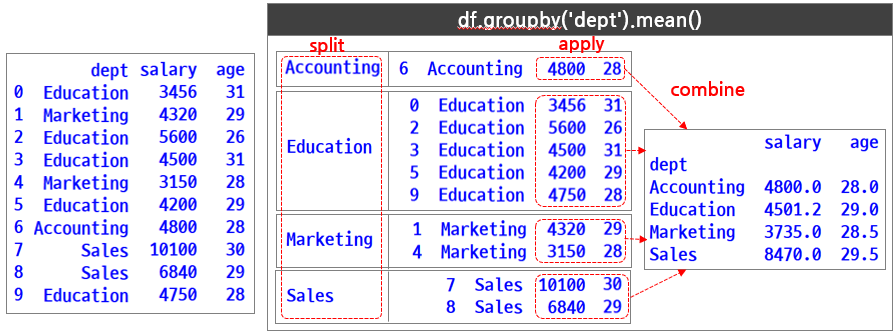

타이타닉 호의 생존자와 사망자를 **성별** 기준으로 그룹핑하여 **평균**을 살펴보겠습니다.

In [15]:
# df의 'sex' 그룹별로 평균을 구합니다
df.groupby(by='sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [16]:
a = df.groupby(by='sex')
for x in a:
    print(x)

('female',      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
2           1       3  female  26.0  ...   NaN  Southampton    yes   True
3           1       1  female  35.0  ...     C  Southampton    yes  False
8           1       3  female  27.0  ...   NaN  Southampton    yes  False
9           1       2  female  14.0  ...   NaN    Cherbourg    yes  False
..        ...     ...     ...   ...  ...   ...          ...    ...    ...
880         1       2  female  25.0  ...   NaN  Southampton    yes  False
882         0       3  female  22.0  ...   NaN  Southampton     no   True
885         0       3  female  39.0  ...   NaN   Queenstown     no  False
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False

[314 rows x 15 columns])
('male',      survived  pclass   sex   age  ...  deck  embark_town  alive  

`groupby()`를 사용할 때는 반드시 aggregate 하는 **통계함수와 일반적으로 같이 적용**합니다.

### 2개 이상의 컬럼으로 그룹

2개 이상의 컬럼으로 그룹핑할 때도 list로 묶어서 지정하면 됩니다.

In [ ]:
# df의 'sex', 'pclass' (성별, 좌석등급) 별 평균을 구합니다
df.groupby(['sex', 'pclass']).mean()

survived        age     sibsp     parch        fare  \
sex    pclass                                                        
female 1       0.968085  34.611765  0.553191  0.457447  106.125798   
       2       0.921053  28.722973  0.486842  0.605263   21.970121   
       3       0.500000  21.750000  0.895833  0.798611   16.118810   
male   1       0.368852  41.281386  0.311475  0.278689   67.226127   
       2       0.157407  30.740707  0.342593  0.222222   19.741782   
       3       0.135447  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    pclass                        
female 1         0.000000  0.361702  
       2         0.000000  0.421053  
       3         0.000000  0.416667  
male   1         0.975410  0.614754  
       2         0.916667  0.666667  
       3         0.919308  0.760807

### 1개의 특정 컬럼에 대한 결과 도출

우리의 주요 관심사는 `survived` 컬럼입니다. 만약 `survived`컬럼에 대한 결과만 도출하고 싶다면 컬럼을 맨 끝에 지정합니다.

In [18]:
# df의 'sex', 'pclass' (성별, 좌석등급) 별 'survived' 컬럼에 대한 평균 구하기 - 결과 Series
df.groupby(['sex', 'pclass'])['survived'].mean() 

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

예쁘게 출력하려면 `pd.DataFrame()`으로 감싸주면 됩니다.

In [20]:
# df의 'sex', 'pclass' (성별, 좌석등급) 별 'survived' 컬럼에 대한 평균 구하기 - 결과 DataFrame
pd.DataFrame(df.groupby(['sex', 'pclass'])['survived'].mean())

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [21]:
df.groupby(['sex', 'pclass'])[['survived']].mean() # 괄호 [] 한번 더묶어도 가능

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

인덱스 초기화 `reset_index()`: 그룹핑된 데이터프레임의 **index를 초기화**하여 새로운 데이터프레임을 생성합니다.

In [25]:
# df의 'sex', 'pclass' (성별, 좌석등급) 별 'survived' 컬럼에 대한 평균을 구한 뒤,
# index 초기화 (index를 column으로 사용되도록 함)
temp = df.groupby(by=['sex', 'pclass'])[['survived']].mean().reset_index()
temp.set_index(['sex', 'pclass'])

survived
sex    pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

### 다중 컬럼에 대한 결과 도출

끝에 단일 컬럼이 아닌 여러 개의 컬럼을 지정합니다.

In [27]:
# df의 'sex', 'pclass' (성별, 좌석등급) 별 'survived', 'age' 컬럼에 대한 평균
df.groupby(by=['sex', 'pclass'])[['survived', 'age']].mean()

survived        age
sex    pclass                     
female 1       0.968085  34.611765
       2       0.921053  28.722973
       3       0.500000  21.750000
male   1       0.368852  41.281386
       2       0.157407  30.740707
       3       0.135447  26.507589

### 다중 통계 함수 적용

여러 가지의 통계 값을 적용할 때는 `agg()`를 사용합니다.

In [28]:
# df의 'sex', 'pclass' (성별, 좌석등급) 별 'survived', 'age' 컬럼에 대한 평균과 합계 
# ('mean', 'sum') 사용
df.groupby(by=['sex', 'pclass'])[['survived', 'age']].agg(['mean', 'sum'])

survived            age         
                   mean sum       mean      sum
sex    pclass                                  
female 1       0.968085  91  34.611765  2942.00
       2       0.921053  70  28.722973  2125.50
       3       0.500000  72  21.750000  2218.50
male   1       0.368852  45  41.281386  4169.42
       2       0.157407  17  30.740707  3043.33
       3       0.135447  47  26.507589  6706.42

**numpy 의 통계 함수도 적용 가능**합니다. (결과는 동일합니다)

In [29]:
import numpy as np
a = np.array([1,3,5,7,9])
func = np.sum
func(a)

25

In [30]:
# df의 'sex', 'pclass' (성별, 좌석등급) 별 'survived', 'age' 컬럼에 대한 평균과 합계 
# np.mean, np.sum 사용
df.groupby(by=['sex', 'pclass'])[['survived', 'age']].agg([np.mean, np.sum])

survived            age         
                   mean sum       mean      sum
sex    pclass                                  
female 1       0.968085  91  34.611765  2942.00
       2       0.921053  70  28.722973  2125.50
       3       0.500000  72  21.750000  2218.50
male   1       0.368852  45  41.281386  4169.42
       2       0.157407  17  30.740707  3043.33
       3       0.135447  47  26.507589  6706.42

## pivot_table()

피벗테이블은 엑셀의 피벗과 동작이 유사하며, `groupby()`와도 동작이 유사합니다.

기본 동작 원리는 `index`, `columns`, `values`를 지정하여 피벗합니다.

### 1개 그룹에 대한 단일 컬럼 결과

In [31]:
# index로 'who', values로 'survived' 사용한 피벗테이블 생성
df.pivot_table(values='survived', index='who')

,survived
who,
child,0.590361
man,0.163873
woman,0.756458


In [32]:
# columns에 'who', values로 'survived' 사용한 피벗테이블 생성
df.pivot_table(values='survived', columns='who', aggfunc='mean')

who,child,man,woman
survived,0.590361,0.163873,0.756458


### 다중 그룹에 대한 단일 컬럼 결과

In [34]:
# index로 'who', 'pclass', values로 'survived' 사용한 피벗테이블 생성
# 다중 그룹 지정 시에는 리스트를 사용합니다
df.pivot_table(values='survived', index=['who', 'pclass'])
#temp = df.pivot_table(index=['who','pclass'], values='survived',aggfunc=lambda x: round(np.mean(x), 2))
#temp = round(df.pivot_table(index=['who','pclass'], values='survived',aggfunc='mean'), 2)

survived
who   pclass          
child 1       0.833333
      2       1.000000
      3       0.431034
man   1       0.352941
      2       0.080808
      3       0.119122
woman 1       0.978022
      2       0.909091
      3       0.491228

### index에 컬럼을 중첩하지 않고 행과 열로 펼친 결과

In [35]:
# index, columns, values를 모두 지정한 피벗 테이블 지정
# index로 'who', columns로 'pclass', values로 'survived' 사용
df.pivot_table(values='survived', index=['who'], columns=['pclass'])

pclass,1,2,3
who,,,
child,0.833333,1.000000,0.431034
man,0.352941,0.080808,0.119122
woman,0.978022,0.909091,0.491228


### 다중 통계함수 적용

In [36]:
# index, columns, values를 모두 지정한 피벗 테이블 지정
# index로 'who', columns로 'pclass', values로 'survived' 사용
# 적용함수로 합계와 평균('sum', 'mean') 을 지정합니다.  (목록은 리스트 사용)
df.pivot_table(index='who', columns='pclass', values='survived', aggfunc=['sum','mean'])

sum              mean                    
pclass   1   2   3         1         2         3
who                                             
child    5  19  25  0.833333  1.000000  0.431034
man     42   8  38  0.352941  0.080808  0.119122
woman   89  60  56  0.978022  0.909091  0.491228